### Benford's Law test on financial statements of Samsung Electronics and LG Electronics

How does Benford's Law work : https://en.wikipedia.org/wiki/Benford%27s_law

financial statement sources:
- http://dart.fss.or.kr/report/viewer.do?rcpNo=20200330003851&dcmNo=7202454&eleId=3&offset=13963&length=636542&dtd=dart3.xsd
- http://dart.fss.or.kr/report/viewer.do?rcpNo=20200330004430&dcmNo=7206121&eleId=3&offset=16647&length=1126855&dtd=dart3.xsd

In [1]:
import dart_benfordlaw
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url =  "http://dart.fss.or.kr/report/viewer.do?rcpNo=20200330003851&dcmNo=7202454&eleId=3&offset=13963&length=636542&dtd=dart3.xsd"
samsung = dart_benfordlaw.benfordlaw(url)

C:\Users\dy090\dart_benfordlaw.py:9: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 9 of the file C:\Users\dy090\dart_benfordlaw.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(resp.text)


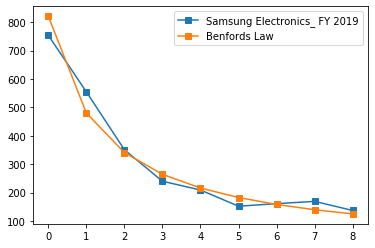

In [3]:
plt.plot(samsung[0], marker = 's', label = 'Samsung Electronics_ FY 2019')
plt.plot(samsung[1], marker = 's', label = 'Benfords Law')
plt.legend()

In [4]:
url =  "http://dart.fss.or.kr/report/viewer.do?rcpNo=20200330004430&dcmNo=7206121&eleId=3&offset=16647&length=1126855&dtd=dart3.xsd"
lg = dart_benfordlaw.benfordlaw(url)

C:\Users\dy090\dart_benfordlaw.py:9: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 9 of the file C:\Users\dy090\dart_benfordlaw.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  soup = BeautifulSoup(resp.text)


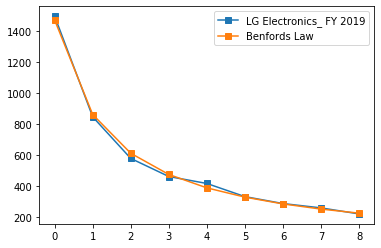

In [5]:
plt.plot(lg[0], marker = 's', label = 'LG Electronics_ FY 2019')
plt.plot(lg[1], marker = 's', label = 'Benfords Law')
plt.legend()

Text(0.5, 1.0, '$\\chi^2$ Distribution (df = 8)')

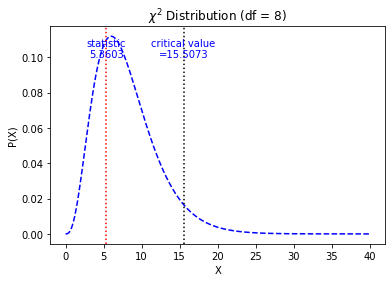

In [6]:
# chi-squared test

from scipy.stats import chisquare
from scipy.stats import chi2
result = chisquare(lg[0], f_exp=lg[1])

import numpy as np

df = 8          
x = np.linspace(0, 40, 201)
y = chi2(df).pdf(x)
plt.plot(x, y, 'b--')

x95 = chi2(df).ppf(.95)
plt.axvline(x=x95, color='black', linestyle=':')
plt.text(x95, .1, 'critical value\n=' + str(round(x95, 4)), 
         horizontalalignment='center', color='b')

plt.axvline(x=result[0], color='r', linestyle=':')
plt.text(result[0], .1, 'statistic\n' + str(round(result[0], 4)), 
         horizontalalignment='center', color='b')

plt.xlabel('X')
plt.ylabel('P(X)')
#plt.grid()
plt.title(r'$\chi^2$ Distribution (df = 8)')
